In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/content/survey lung cancer (1).csv")

# Display basic information about the data
print("Data Info:")
print(data.info())



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER 

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))

# Handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])




Summary Statistics:
       GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count     309  309.000000  309.000000      309.000000  309.000000   
unique      2         NaN         NaN             NaN         NaN   
top         M         NaN         NaN             NaN         NaN   
freq      162         NaN         NaN             NaN         NaN   
mean      NaN   62.673139    1.563107        1.569579    1.498382   
std       NaN    8.210301    0.496806        0.495938    0.500808   
min       NaN   21.000000    1.000000        1.000000    1.000000   
25%       NaN   57.000000    1.000000        1.000000    1.000000   
50%       NaN   62.000000    2.000000        2.000000    1.000000   
75%       NaN   69.000000    2.000000        2.000000    2.000000   
max       NaN   87.000000    2.000000        2.000000    2.000000   

        PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count      309.000000       309.000000  309.000000  309.000000  309.0000

In [ ]:
# For simplicity, we'll fill missing values with the mode (for categorical) or median (for numerical)
for column in data.columns:
    if data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

# Verify missing values handled
print("\nMissing Values After Handling:")
print(data.isnull().sum())




Missing Values After Handling:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
# Ensure 'LUNG_CANCER' is included in encoding
# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=False)

# Ensure 'LUNG_CANCER' is correctly encoded or included
print("\nEncoded Data Columns:")
print(data_encoded.columns)




Encoded Data Columns:
Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_F', 'GENDER_M',
       'LUNG_CANCER_NO', 'LUNG_CANCER_YES'],
      dtype='object')


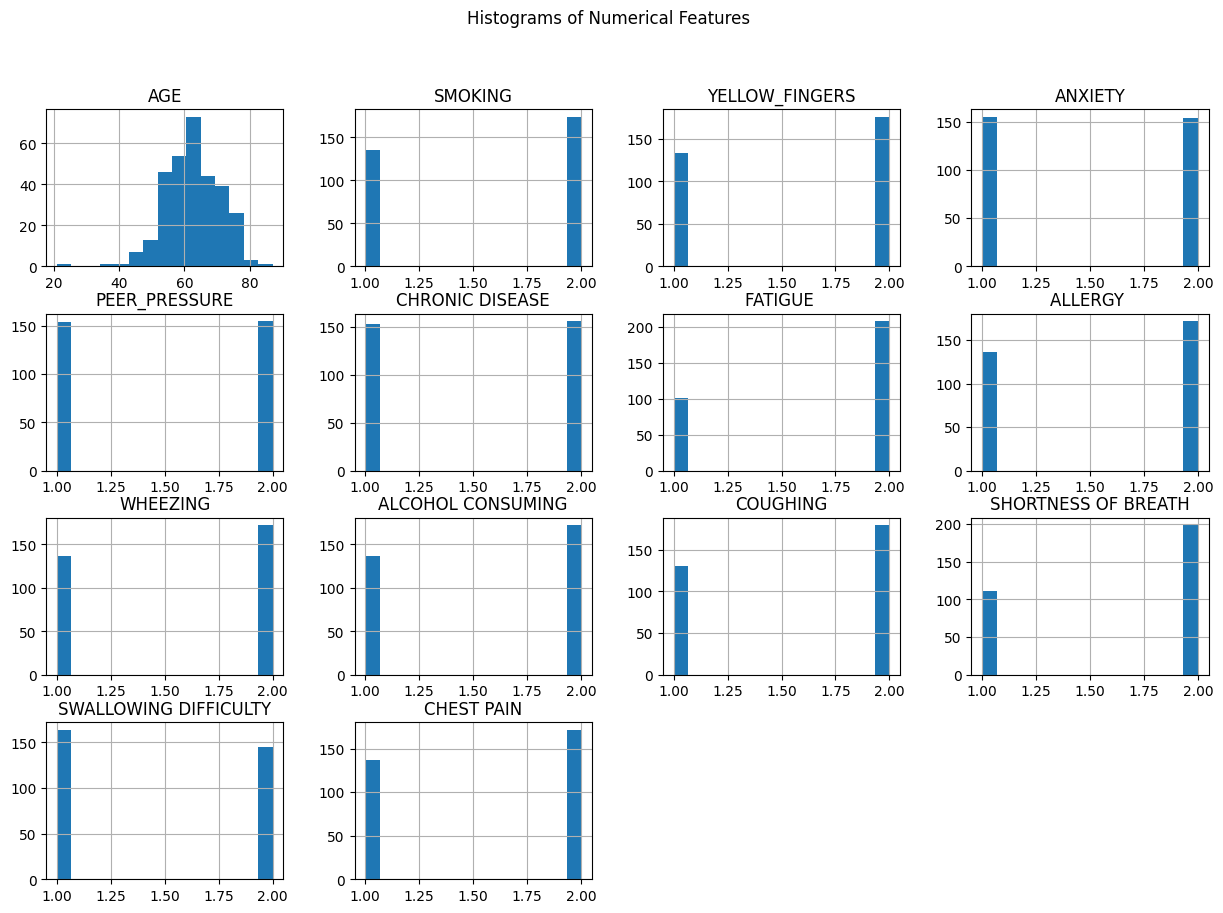

In [ ]:
# Plot histograms for numerical features
numerical_features = data_encoded.select_dtypes(include=[np.number])
numerical_features.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()



In [8]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
replacement_mapping = {1: 0, 2: 1}
data['lung_cancer'] = data['lung_cancer'].replace({"YES":1,"NO":0})

<ipython-input-8-4bb2353f2dd0>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['lung_cancer'] = data['lung_cancer'].replace({"YES":1,"NO":0})


In [9]:
data = data.drop_duplicates()
data.shape
data.isnull().sum()

data['age'].describe()

,age
count,276.000000
mean,62.909420
std,8.379355
min,21.000000
25%,57.750000
50%,62.500000
75%,69.000000
max,87.000000


In [5]:
data['GENDER'] = data['GENDER'].replace({"M":1,"F":2})

<ipython-input-5-5e2118f2ee3f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['GENDER'] = data['GENDER'].replace({"M":1,"F":2})


In [11]:
import matplotlib

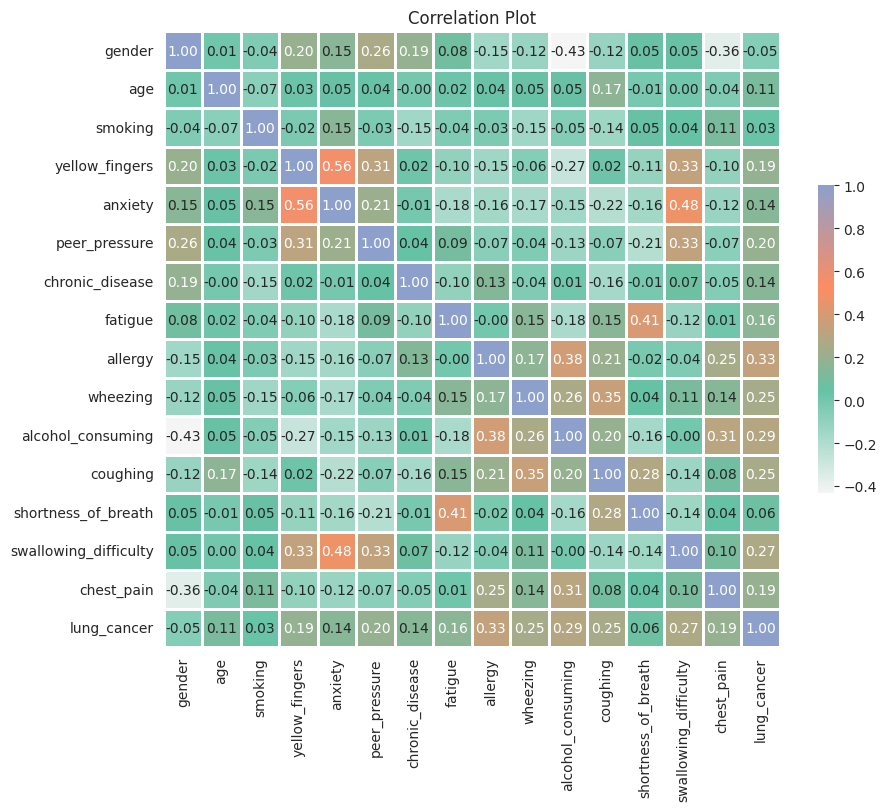

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
colors = ['#f5f5f5', '#66c2a5', '#fc8d62', '#8da0cb']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", colors)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=colormap,
            cbar_kws={"shrink": .5}, square=True,
            linewidths=1, linecolor='white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Plot")
plt.show()

In [23]:
data['age_cat'] = pd.cut(data['age'],bins=[0,13,18,45,60,130],labels=['Children','Teens','Adults','Mid Adults','Elderly'])
data.groupby(['age_cat','lung_cancer']).size().unstack(fill_value=0)


<ipython-input-23-a6c9b88b119f>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



lung_cancer,0,1
age_cat,,
Children,0,0
Teens,0,0
Adults,1,4
Mid Adults,18,85
Elderly,19,149


<ipython-input-26-de0e1c87c1fa>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




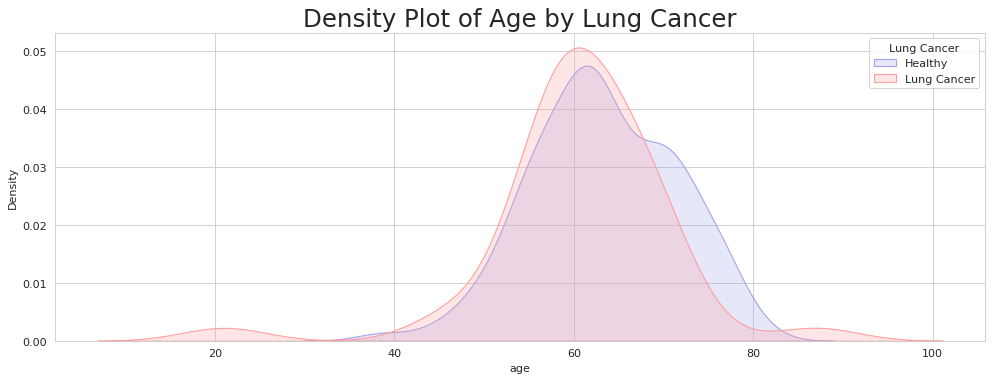

In [26]:
plt.figure(figsize=(15,5),dpi=80)
sns.kdeplot(data=data,x='age',hue="lung_cancer",shade=True,common_norm=False,palette=['#ff9f9f','#a3a3ec'])
plt.title('Density Plot of Age by Lung Cancer',fontsize=22)
plt.legend(title='Lung Cancer',loc = 'upper right',labels=['Healthy','Lung Cancer'])
plt.show()
fig = px.violin(data, x='lung_cancer', y='age', box=True, points='all',
                title='Age Distribution by Lung Cancer (Violin & Swarm)',
                color='lung_cancer',
                category_orders={'lung_cancer': ['Yes', 'No']},
                labels={'age': 'Age', 'lung_cancer': 'Lung Cancer'},
                color_discrete_sequence=['#ff9f9f', '#a3a3ec'])
fig.update_layout(
    xaxis_title='Lung Cancer',
    yaxis_title='Age',
    legend_title='Lung Cancer',
    showlegend=True
)

fig.show()

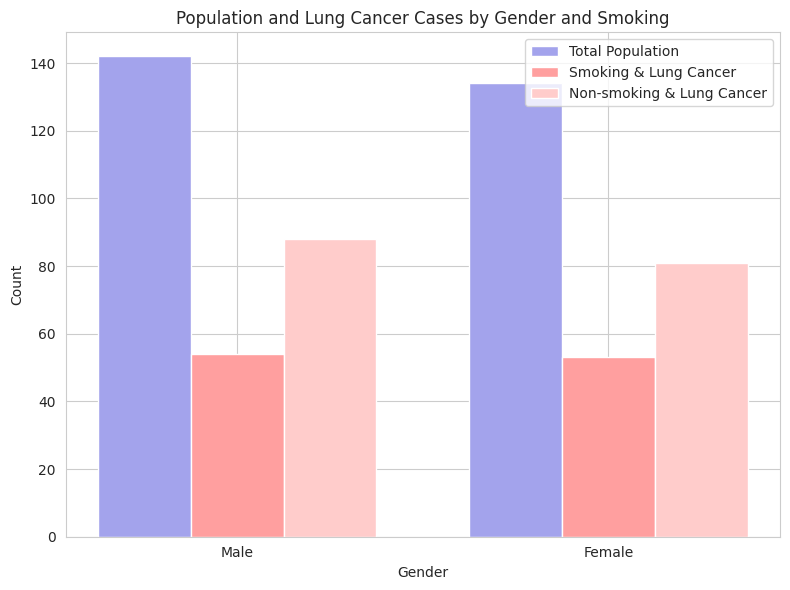

In [27]:
import matplotlib.pyplot as plt
import numpy as np

gender = ['Male', 'Female']
total_population = [142, 134]
smoking_lc = [54, 53]
non_smoking_lc = [88, 81]

bar_width = 0.25
index = np.arange(len(gender))

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(index - bar_width, total_population, bar_width, label='Total Population', color='#a3a3ec')
bar2 = ax.bar(index, smoking_lc, bar_width, label='Smoking & Lung Cancer', color='#ff9f9f')
bar3 = ax.bar(index + bar_width, non_smoking_lc, bar_width, label='Non-smoking & Lung Cancer', color='#ffcccb')

ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Population and Lung Cancer Cases by Gender and Smoking')
ax.set_xticks(index)
ax.set_xticklabels(gender)
ax.legend()
plt.tight_layout()
plt.show()

<ipython-input-9-962ed7106191>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set2')


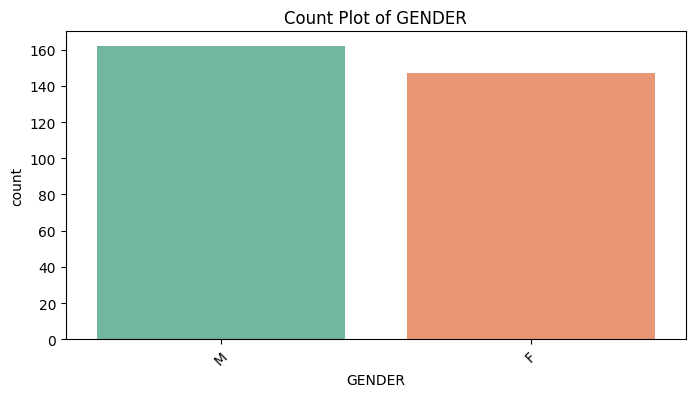

<ipython-input-9-962ed7106191>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette='Set2')


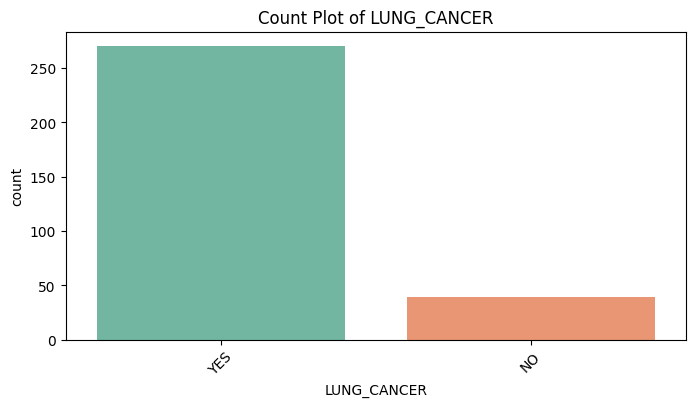

In [ ]:
# Plot histograms for categorical features (before encoding)
categorical_features = data.select_dtypes(include=[object])
for column in categorical_features.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, palette='Set2')
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()



In [ ]:
# Plot pairplot to explore relationships between features (after encoding)
# Check if 'LUNG_CANCER' is still present in the encoded data
if 'LUNG_CANCER' in data_encoded.columns:
    sns.pairplot(data_encoded, hue='LUNG_CANCER', diag_kind='kde', palette='Set1')
    plt.suptitle('Pair Plot of Features', y=1.02)
    plt.show()
else:
    print("'LUNG_CANCER' not found in the encoded data. Please check encoding.")




'LUNG_CANCER' not found in the encoded data. Please check encoding.


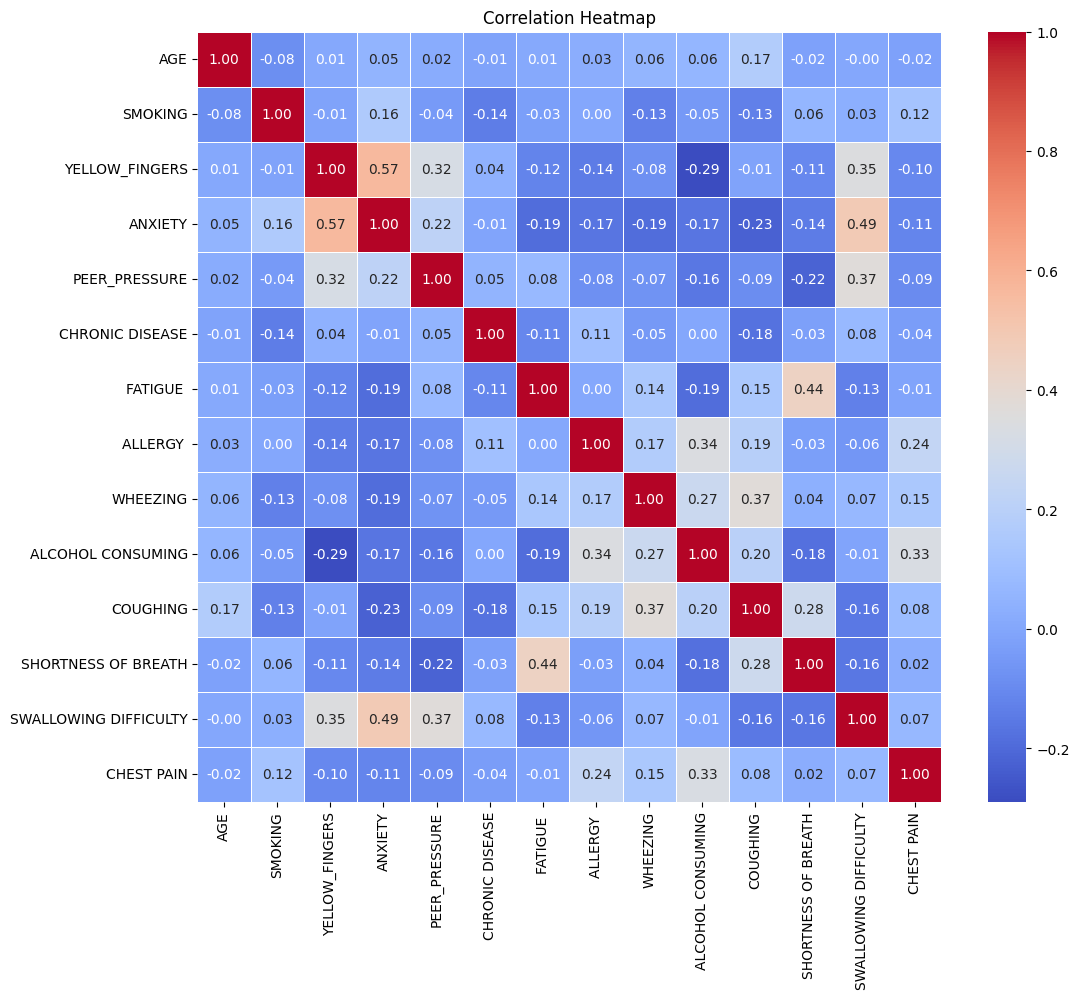

'LUNG_CANCER' not found in the encoded data. Please check encoding.


In [ ]:
# Correlation heatmap
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Boxplots to visualize the distribution of numerical features against the target
if 'LUNG_CANCER' in data_encoded.columns:
    for column in numerical_features.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=data_encoded, x='LUNG_CANCER', y=column, palette='Set2')
        plt.title(f'Boxplot of {column} by Lung Cancer Status')
        plt.show()
else:
    print("'LUNG_CANCER' not found in the encoded data. Please check encoding.")

Accuracy obtained by Random Forest Classifier model: 99.07407407407408


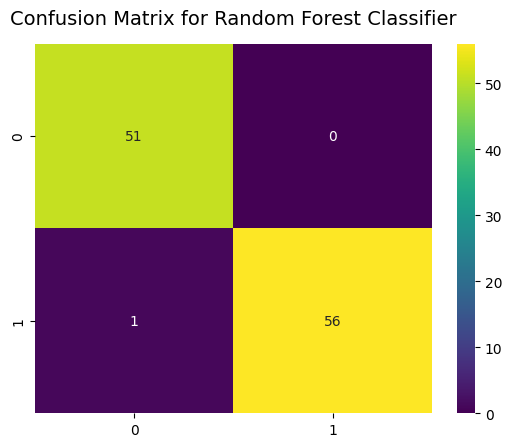

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objs as go
from imblearn.over_sampling import RandomOverSampler

warnings.simplefilter("ignore")

# Load the data
data = pd.read_csv("/content/survey lung cancer.csv")

# Map categorical values to numeric
data['GENDER'] = data['GENDER'].map({'F': 0, 'M': 1})
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Prepare data for training
X = data.drop("LUNG_CANCER", axis=1)
y = data["LUNG_CANCER"]

# Balance the dataset
over_samp = RandomOverSampler(random_state=0)
X_res, y_res = over_samp.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Evaluate Random Forest Classifier
rfc_score = rfc.score(X_test, y_test)
print("Accuracy obtained by Random Forest Classifier model:", rfc_score * 100)

# Confusion Matrix
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03)
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_rfc))


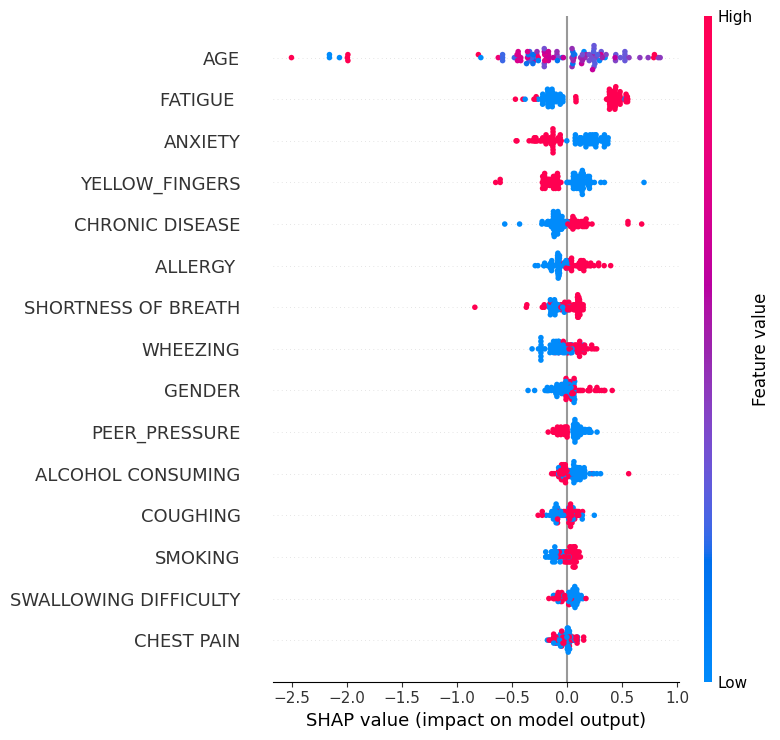

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_resampled)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])

# Single prediction explanation
# Choose an instance to explain
instance_idx = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[instance_idx].values, X_test[instance_idx], feature_names=data.columns[:-1])


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_resampled,
    feature_names=data.columns[:-1],
    class_names=['Negative', 'Positive'],
    mode='classification'
)

# Explain a single prediction
# Choose an instance to explain
instance_idx = 0
exp = lime_explainer.explain_instance(X_test[instance_idx], best_model.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)
